
# Project: Investigate a Dataset - [Database_NCIS_and_Census_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description  

The database of NCIS and census consists of data from two sources; gun data provided by the FBI and census data about the population. The gun data excel sheet consists of data about the gun transactions performed since 1998 until the end of 2017. 

<h4> Gun Data </h4>
Each column in the gun data represents the type of transaction submitted to the National Instant Criminal Background Check System (NICS). Additionally, each transaction is broken down by the firearm type as follows:

* Handgun – any firearm which has a short stock and is designed to be held and fired by the use of a single hand or it can be a combination of any of the mentioned parts, from which a firearm can be assembled.
* Long Gun – represents weapons intended to be fired from the shoulder or those made to use the energy of an explosive in either a fixed metallic cartridge to fire a single projectile through a rifled bore for each single pull of the trigger, or a fixed shotgun shell to fire through a smooth bore for each single pull of the trigger.
* Other – refers to frames, receivers, and other firearms, that are neither hand guns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expels a shotgun shell, or National Firearm Act firearms, including silencers.

Other type of transactions include:
* Pre-pawn – background checks requested by an officially-licensed FFL on prospective firearm transferees seeking to pledge or pawn a firearm as security for payment or repayment of money prior to actually pawning or pledging the firearm.
* Redemption – background checks requested officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning one as security at a pawn shop.
* Returned/Disposition – background checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited.
* Rentals – background checks requested by an officially-licensed FFL on prospective firearm transferees on attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business.
* Private Sale – background checks requested by an officially-licensed FFL on prospective firearm transferees on attempting to possess a firearm from a private party seller who is not an officially licensed FFL.
* Return to Seller-Private Sale – background checks requested by an officially-licensed FFL on prospective firearm transferees on attempting to possess a firearm from a private party seller who is not an officially licensed FFL.

**N.B The statistics within the gun data document represent the number of firearm background checks initiated though the NICS for transactions. They do not represent the number of firearms sold. Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be established between a firearm background check and firearm sale**

<h4> Census Data </h4>
The census data CSV file includes data obtained in April 01, 2010 and July 01, 2016 about the population estimates, number of housing units, percentage of females, percentage of people under 5 years old, percentage of people under 18 years old and percentage of people above 65 years old. It also contains percentages of different races living across the U.S. in 2016. It also includes information about per capita income, median household income, healthcare and accommodation obtained in 2011, or 2015 or 2016.



### Question(s) for Analysis
We are interested to know which state had the highest growth in gun transactions/registrations from Apr, 2010 till Jul, 2016. Second, we want to see the trend in gun purchases among the different states. Finally, let's see if we can find a correlation between the percent change in gun transactions with age, gender and number of housing units.


In [1]:
# import statements for all of the packages to be used.
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 



In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_census=pd.read_csv("Database_Ncis_and_Census_data/US_Census_Data.csv", header=None)
read_file = pd.read_excel (r'Database_Ncis_and_Census_data/gun_data.xlsx')
read_file.to_csv (r'Database_Ncis_and_Census_data/gun_data.csv', index = None, header=True)
df_gun=pd.read_csv("Database_Ncis_and_Census_data/gun_data.csv", index_col = 'state')

In [3]:
# view the census dataset and get familiar with the data
df_census

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
2,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
3,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
5,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
6,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
7,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
8,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
9,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%


In [4]:
# make sure there are no missing values
df_census.isnull().sum()

0      5
1     57
2     20
3     20
4     20
5     20
6     20
7     20
8     20
9     20
10    20
11    20
12    20
13    20
14    20
15    20
16    20
17    20
18    20
19    20
20    20
21    20
22    20
23    20
24    20
25    20
26    20
27    20
28    20
29    20
30    20
31    20
32    20
33    20
34    20
35    20
36    20
37    20
38    20
39    20
40    20
41    20
42    20
43    20
44    20
45    20
46    20
47    20
48    20
49    20
50    20
51    20
dtype: int64

In [5]:
# check the datatypes in each column
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 52 columns):
0     81 non-null object
1     29 non-null object
2     66 non-null object
3     66 non-null object
4     66 non-null object
5     66 non-null object
6     66 non-null object
7     66 non-null object
8     66 non-null object
9     66 non-null object
10    66 non-null object
11    66 non-null object
12    66 non-null object
13    66 non-null object
14    66 non-null object
15    66 non-null object
16    66 non-null object
17    66 non-null object
18    66 non-null object
19    66 non-null object
20    66 non-null object
21    66 non-null object
22    66 non-null object
23    66 non-null object
24    66 non-null object
25    66 non-null object
26    66 non-null object
27    66 non-null object
28    66 non-null object
29    66 non-null object
30    66 non-null object
31    66 non-null object
32    66 non-null object
33    66 non-null object
34    66 non-null object
35    66 non-null obje

In [6]:
# view the second dataset
df_gun.head()

,month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Alabama,2017-09,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
Alaska,2017-09,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
Arizona,2017-09,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
Arkansas,2017-09,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
California,2017-09,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [7]:
# check the datatypes
df_gun.dtypes

month                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
dtype: object

In [8]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12485 entries, Alabama to Wyoming
Data columns (total 26 columns):
month                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other               1815 non-null float64
rentals_handgu

After checking the datasets, the following points need to be adjusted:

**Census Data**
* From the census data, we only need population, age, gender and number of housing units information. Thus, we can drop the other rows. Also, the 'Fact Note' column can be dropped as well.
* We also need to convert all the datatypes in the census data to floats

**Gun Data**
* The 'month' column needs to be changed to datetime to be able to better use it and we have to make sure that all other datatypes are converted to floats.
* Also, we need to extract the gun data for the years 2010 and 2016 and append them in one dataset.

Finally, in order to be able to combine the census dataset and the gun dataset together, we have to drop the missing columns in the census datasets from the gun dataset, which are: 'District of Columbia', 'Guam', 'Mariana Islands', and 'Virginia Islands'.


### Data Cleaning
> **Tip**: Make sure to keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [9]:
#drop unwanted rows in the census data
df_census=df_census.drop(range(13,23))
df_census=df_census.drop(range(25,86))

# view data to make sure that the right rows were dropped
df_census

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
2,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
3,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
5,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
6,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
7,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
8,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
9,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%


In [10]:
#drop the Fact Note column 
df_census.drop([1], axis=1, inplace=True)
df_census

,0,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
2,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
3,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
5,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
6,"Persons under 5 years, percent, April 1, 2010",6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
7,"Persons under 18 years, percent, July 1, 2016,...",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
8,"Persons under 18 years, percent, April 1, 2010",23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
9,"Persons 65 years and over, percent, July 1, 2...",16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%


As previously highlighted, we are interested in census data related to population numbers, age, gender, and housing units in years 2010 and 2016. Therefore, other columns were dropped. Now, we need to convert all the datatypes in the census dataframe to floats but many values contain spaces and % signs so, we need to remove them first. 

In [11]:
# https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once
# remove commas and % sign to be able to convert the necessary datatypes to floats

df_census.replace(',','', regex=True, inplace=True)
df_census.replace('%','', regex=True, inplace=True)

In [12]:
# https://stackoverflow.com/questions/55283469/how-to-convert-a-specific-range-of-elements-in-a-panda-dataframe-into-float-numb
# convert all datatypes in the census data to floats
#set columns by first row
df_census.columns = df_census.iloc[0]
#set index by first column
df_census.index = df_census.iloc[:, 0]
#remove first row, first col and cast to floats
df_census = df_census.iloc[1:, 1:].astype(float)

In [13]:
# check that all the datatypes are converted to floats
df_census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Population estimates July 1 2016  (V2016) to Housing units April 1 2010
Data columns (total 50 columns):
Alabama           14 non-null float64
Alaska            14 non-null float64
Arizona           14 non-null float64
Arkansas          14 non-null float64
California        14 non-null float64
Colorado          14 non-null float64
Connecticut       14 non-null float64
Delaware          14 non-null float64
Florida           14 non-null float64
Georgia           14 non-null float64
Hawaii            14 non-null float64
Idaho             14 non-null float64
Illinois          14 non-null float64
Indiana           14 non-null float64
Iowa              14 non-null float64
Kansas            14 non-null float64
Kentucky          14 non-null float64
Louisiana         14 non-null float64
Maine             14 non-null float64
Maryland          14 non-null float64
Massachusetts     14 non-null float64
Michigan          14 non-null float64
Mi

In [14]:
# convert month to datetime in the gun dataset
df_gun['month']=pd.to_datetime(df_gun['month'])

In [15]:
# Fill Nan values with zeroes
df_gun=df_gun.fillna(0)

In [16]:
# check that the month dtype is converted to datetime and that there are no missing values 
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12485 entries, Alabama to Wyoming
Data columns (total 26 columns):
month                        12485 non-null datetime64[ns]
permit                       12485 non-null float64
permit_recheck               12485 non-null float64
handgun                      12485 non-null float64
long_gun                     12485 non-null float64
other                        12485 non-null float64
multiple                     12485 non-null int64
admin                        12485 non-null float64
prepawn_handgun              12485 non-null float64
prepawn_long_gun             12485 non-null float64
prepawn_other                12485 non-null float64
redemption_handgun           12485 non-null float64
redemption_long_gun          12485 non-null float64
redemption_other             12485 non-null float64
returned_handgun             12485 non-null float64
returned_long_gun            12485 non-null float64
returned_other               12485 non-null float64

In [17]:
df_census.rename(columns={'index':'state'}, inplace=True)

In [18]:
# drop missing values in the census data from the gun dataset
df_gun.drop(['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands'], inplace=True)

In [19]:
# drop columns from the gun dataset that mostly contain NaN and at the same time are irrelevant to our analysis
df_gun.drop(columns=df_gun.columns[2], axis=1, inplace= True)
df_gun.drop(columns=df_gun.columns[7:24], axis=1, inplace=True)

In [20]:
# convert int datatypes to float
df_gun['multiple']=df_gun['multiple'].astype(float)
df_gun['totals']=df_gun['totals'].astype(float)

In [21]:
# make sure that all the required changes were correctly implemented
df_gun

,month,permit,handgun,long_gun,other,multiple,admin,totals
state,,,,,,,,
Alabama,2017-09-01,16717.0,5734.0,6320.0,221.0,317.0,0.0,32019.0
Alaska,2017-09-01,209.0,2320.0,2930.0,219.0,160.0,0.0,6303.0
Arizona,2017-09-01,5069.0,11063.0,7946.0,920.0,631.0,0.0,28394.0
Arkansas,2017-09-01,2935.0,4347.0,6063.0,165.0,366.0,51.0,17747.0
California,2017-09-01,57839.0,37165.0,24581.0,2984.0,0.0,0.0,123506.0
Colorado,2017-09-01,4356.0,15751.0,13448.0,1007.0,1062.0,0.0,35873.0
Connecticut,2017-09-01,4343.0,4834.0,1993.0,274.0,0.0,0.0,12117.0
Delaware,2017-09-01,275.0,1414.0,1538.0,66.0,68.0,0.0,3502.0
Florida,2017-09-01,10784.0,39199.0,17949.0,2319.0,1721.0,1.0,77390.0


In [22]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11350 entries, Alabama to Wyoming
Data columns (total 8 columns):
month       11350 non-null datetime64[ns]
permit      11350 non-null float64
handgun     11350 non-null float64
long_gun    11350 non-null float64
other       11350 non-null float64
multiple    11350 non-null float64
admin       11350 non-null float64
totals      11350 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 798.0+ KB


In [23]:
# extract gun data on April 01 2010
df_gun_01apr2010 = df_gun[df_gun['month']=='2010-04-01']
df_gun_01apr2010

,month,permit,handgun,long_gun,other,multiple,admin,totals
state,,,,,,,,
Alabama,2010-04-01,396.0,8727.0,8095.0,131.0,394.0,0.0,20791.0
Alaska,2010-04-01,0.0,2650.0,3136.0,64.0,135.0,0.0,6411.0
Arizona,2010-04-01,1905.0,7787.0,5097.0,198.0,309.0,0.0,16578.0
Arkansas,2010-04-01,4303.0,3865.0,3833.0,45.0,197.0,1.0,14563.0
California,2010-04-01,26930.0,26170.0,27650.0,0.0,0.0,0.0,80750.0
Colorado,2010-04-01,0.0,10998.0,9403.0,0.0,3208.0,0.0,23609.0
Connecticut,2010-04-01,8726.0,3994.0,3098.0,97.0,0.0,7.0,15922.0
Delaware,2010-04-01,0.0,772.0,626.0,17.0,24.0,0.0,1439.0
Florida,2010-04-01,1.0,26817.0,12952.0,0.0,1207.0,475.0,42794.0


In [24]:
# extract gun data on July 01 2016
df_gun_01jul2016 = df_gun[df_gun['month']=='2016-07-01']
df_gun_01jul2016

,month,permit,handgun,long_gun,other,multiple,admin,totals
state,,,,,,,,
Alabama,2016-07-01,27765.0,10132.0,7392.0,538.0,465.0,0.0,48927.0
Alaska,2016-07-01,215.0,2898.0,2816.0,239.0,165.0,0.0,6793.0
Arizona,2016-07-01,7863.0,13693.0,8643.0,1283.0,642.0,0.0,34496.0
Arkansas,2016-07-01,4116.0,6323.0,5053.0,325.0,367.0,2.0,19378.0
California,2016-07-01,77962.0,46361.0,47594.0,17297.0,0.0,0.0,190218.0
Colorado,2016-07-01,6372.0,18765.0,15176.0,1505.0,1054.0,0.0,43094.0
Connecticut,2016-07-01,14156.0,11328.0,4015.0,252.0,0.0,4.0,29755.0
Delaware,2016-07-01,755.0,1859.0,1569.0,140.0,74.0,0.0,4494.0
Florida,2016-07-01,28106.0,57902.0,28000.0,4504.0,2324.0,12.0,125208.0


Now, we need to combine both gun datasets from 2010 and 2016 together but first we have to assign a label for each column of both datasets to differentiate them by the year

In [25]:
# add _2010 to all columns in the 2010 gun dataset
df_gun_01apr2010.rename(columns=lambda x: x[0:] + "_2010", inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [26]:
# add _2016 to all columns in the 2016 gun dataset
df_gun_01jul2016.rename(columns=lambda x: x[0:] + "_2016", inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [27]:
#combine both gun datasets together
df_gun_data=df_gun_01apr2010.join(df_gun_01jul2016)

In [28]:
# check that both datasets were joined correctly
df_gun_data

,month_2010,permit_2010,handgun_2010,long_gun_2010,other_2010,multiple_2010,admin_2010,totals_2010,month_2016,permit_2016,handgun_2016,long_gun_2016,other_2016,multiple_2016,admin_2016,totals_2016
state,,,,,,,,,,,,,,,,
Alabama,2010-04-01,396.0,8727.0,8095.0,131.0,394.0,0.0,20791.0,2016-07-01,27765.0,10132.0,7392.0,538.0,465.0,0.0,48927.0
Alaska,2010-04-01,0.0,2650.0,3136.0,64.0,135.0,0.0,6411.0,2016-07-01,215.0,2898.0,2816.0,239.0,165.0,0.0,6793.0
Arizona,2010-04-01,1905.0,7787.0,5097.0,198.0,309.0,0.0,16578.0,2016-07-01,7863.0,13693.0,8643.0,1283.0,642.0,0.0,34496.0
Arkansas,2010-04-01,4303.0,3865.0,3833.0,45.0,197.0,1.0,14563.0,2016-07-01,4116.0,6323.0,5053.0,325.0,367.0,2.0,19378.0
California,2010-04-01,26930.0,26170.0,27650.0,0.0,0.0,0.0,80750.0,2016-07-01,77962.0,46361.0,47594.0,17297.0,0.0,0.0,190218.0
Colorado,2010-04-01,0.0,10998.0,9403.0,0.0,3208.0,0.0,23609.0,2016-07-01,6372.0,18765.0,15176.0,1505.0,1054.0,0.0,43094.0
Connecticut,2010-04-01,8726.0,3994.0,3098.0,97.0,0.0,7.0,15922.0,2016-07-01,14156.0,11328.0,4015.0,252.0,0.0,4.0,29755.0
Delaware,2010-04-01,0.0,772.0,626.0,17.0,24.0,0.0,1439.0,2016-07-01,755.0,1859.0,1569.0,140.0,74.0,0.0,4494.0
Florida,2010-04-01,1.0,26817.0,12952.0,0.0,1207.0,475.0,42794.0,2016-07-01,28106.0,57902.0,28000.0,4504.0,2324.0,12.0,125208.0


In [29]:
# drop the month columns as they are unnecessary now
df_gun_data=df_gun_data.drop(columns=["month_2010", "month_2016"])

Finally, we want to combine the gun dataset with the census data. So, we need to transpose the census dataset in order to have the same columns and thus be able to join both datasets. We will also change the column names to make them shorter and easier to recall.

In [30]:
df_census=df_census.transpose()

In [31]:
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
df_census.set_axis(['pop_estimates_2016', 'pop_estimates_2010', 'pop_change', 'pop_census_2010', 'under5_2016', 
                   'under5_2010', 'under18_2016', 'under18_2010', '65_2016', '65_2010', 'female_2016', 'female_2010', 'housing_2016', 
                   'housing_2010'], axis=1, inplace=True)

In [32]:
# check the census data after the applied adjustments
df_census

,pop_estimates_2016,pop_estimates_2010,pop_change,pop_census_2010,under5_2016,under5_2010,under18_2016,under18_2010,65_2016,65_2010,female_2016,female_2010,housing_2016,housing_2010
0,,,,,,,,,,,,,,
Alabama,4863300.0,4780131.0,1.700,4779736.0,6.000,6.400,22.600,23.700,16.100,13.800,51.600,51.500,2230185.0,2171853.0
Alaska,741894.0,710249.0,4.500,710231.0,7.300,7.600,25.200,26.400,10.400,7.700,47.700,48.000,310658.0,306967.0
Arizona,6931071.0,6392301.0,8.400,6392017.0,6.300,7.100,23.500,25.500,16.900,13.800,50.300,50.300,2961003.0,2844526.0
Arkansas,2988248.0,2916025.0,2.500,2915918.0,6.400,6.800,23.600,24.400,16.300,14.400,50.900,50.900,1354762.0,1316299.0
California,39250017.0,37254522.0,5.400,37253956.0,6.300,6.800,23.200,25.000,13.600,11.400,50.300,50.300,14060525.0,13680081.0
Colorado,5540545.0,5029324.0,10.200,5029196.0,6.100,6.800,22.800,24.400,13.400,10.900,49.700,49.900,2339118.0,2212898.0
Connecticut,3576452.0,3574114.0,0.100,3574097.0,5.200,5.700,21.100,22.900,16.100,14.200,51.200,51.300,1499116.0,1487891.0
Delaware,952065.0,897936.0,6.000,897934.0,5.800,6.200,21.500,22.900,17.500,14.400,51.600,51.600,426149.0,405885.0
Florida,20612439.0,18804592.0,9.600,18801310.0,5.500,5.700,20.100,21.300,19.900,17.300,51.100,51.100,9301642.0,8989580.0


In [33]:
# join the census and the gun datasets together
df_census_gun=df_census.join(df_gun_data)

In [34]:
# check that there are no null values and that all datatypes are the same
df_census_gun.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 28 columns):
pop_estimates_2016    50 non-null float64
pop_estimates_2010    50 non-null float64
pop_change            50 non-null float64
pop_census_2010       50 non-null float64
under5_2016           50 non-null float64
under5_2010           50 non-null float64
under18_2016          50 non-null float64
under18_2010          50 non-null float64
65_2016               50 non-null float64
65_2010               50 non-null float64
female_2016           50 non-null float64
female_2010           50 non-null float64
housing_2016          50 non-null float64
housing_2010          50 non-null float64
permit_2010           50 non-null float64
handgun_2010          50 non-null float64
long_gun_2010         50 non-null float64
other_2010            50 non-null float64
multiple_2010         50 non-null float64
admin_2010            50 non-null float64
totals_2010           50 non-null float64
permit_20

<a id='eda'></a>
## Exploratory Data Analysis

>  Now that I've trimmed and cleaned the data, I am ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that I posed in the Introduction section.  



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended to be systematic with the approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. At least three variables should be explored in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. 


### Research Question 1 (What is the general trend in gun transactions and which variables are most associated with higher gun transactions?)

We can first use calculate the percent change in the total gun transactions between 2016 and 2010 in order to see the general trend in gun transactions across the years. Second, we can plot two heatmaps; one for the 2010 data and one for 2016 in order to know which variables are highly correlated with the change in gun transactions.

In [35]:
df_census_gun.describe()

,pop_estimates_2016,pop_estimates_2010,pop_change,pop_census_2010,under5_2016,under5_2010,under18_2016,under18_2010,65_2016,65_2010,...,multiple_2010,admin_2010,totals_2010,permit_2016,handgun_2016,long_gun_2016,other_2016,multiple_2016,admin_2016,totals_2016
count,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,...,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,6.448927e+06,6.163127e+06,3.120700,6.162876e+06,4.696780,5.021400,17.425780,18.338000,11.81044,9.989360,...,308.220000,10.740000,24517.7400,19011.440000,12550.300000,8801.020000,1065.740000,427.800000,4.600000,43710.400000
std,7.271769e+06,6.848463e+06,3.366857,6.848235e+06,2.697349,2.902275,9.936137,10.431304,6.84738,5.814701,...,497.993865,67.193236,34280.1673,51558.172316,13515.737678,8693.329327,2520.780976,556.719216,20.695065,61544.999748
min,5.855010e+05,5.637670e+05,-1.200000,5.636260e+05,0.052000,0.055000,0.197000,0.213000,0.14500,0.129000,...,0.000000,0.000000,963.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1565.000000
25%,1.850106e+06,1.833003e+06,0.069250,1.833004e+06,4.825000,5.125000,19.025000,20.700000,10.42500,8.025000,...,66.250000,0.000000,7197.5000,1308.750000,3392.250000,3390.000000,150.250000,58.750000,0.000000,11823.000000
50%,4.559320e+06,4.436412e+06,2.050000,4.436370e+06,6.000000,6.350000,22.250000,23.500000,15.00000,12.450000,...,181.500000,0.000000,15242.5000,3810.000000,9560.500000,6002.500000,326.500000,227.000000,0.000000,25379.500000
75%,7.198768e+06,6.680362e+06,5.075000,6.680312e+06,6.400000,6.800000,23.450000,24.550000,16.10000,13.800000,...,387.000000,0.000000,26335.5000,14417.750000,15574.500000,11859.000000,1114.250000,607.500000,2.000000,46008.500000
max,3.925002e+07,3.725452e+07,10.800000,3.725396e+07,8.300000,9.500000,30.200000,31.500000,19.90000,17.300000,...,3208.000000,475.000000,211261.0000,342858.000000,57902.000000,47594.000000,17297.000000,2698.000000,145.000000,363085.000000


In [36]:
df_totals_difference=df_census_gun['totals_2016'] - df_census_gun['totals_2010']

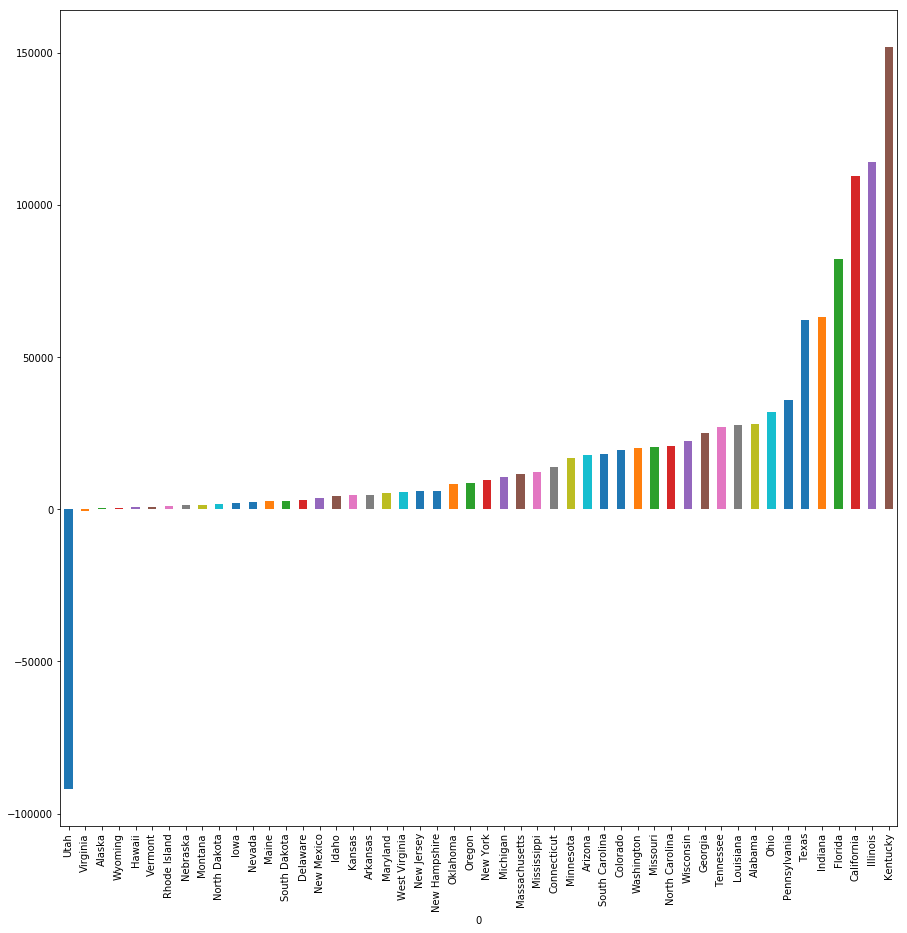

In [37]:
#General trend in gun transactions
df_totals_difference.sort_values().plot(kind='bar', figsize=(15,15));

The above graph demonstrates that the total gun transactions have generally increased in all states except Utah and Virginia. So, let's find out which variables are ostly associated with the increase in gun transactions. Also, the summary statistics showed that the mean total gun transactions increased from 2010 to 2016.

In [38]:
# define function to plot heat map
def heat_map(year): 

    d = (df_census_gun.loc[:, ['pop_estimates_{}'.format(year), 'under5_{}'.format(year), 'under18_{}'.format(year), '65_{}'.format(year), 
     'female_{}'.format(year), 'housing_{}'.format(year), 'handgun_{}'.format(year), 'long_gun_{}'.format(year), 'other_{}'.format(year), 
    'totals_{}'.format(year)]]
    .applymap(lambda v: int(v))
    .dropna()
    ).corr()
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.heatmap(d, annot=True) 
    

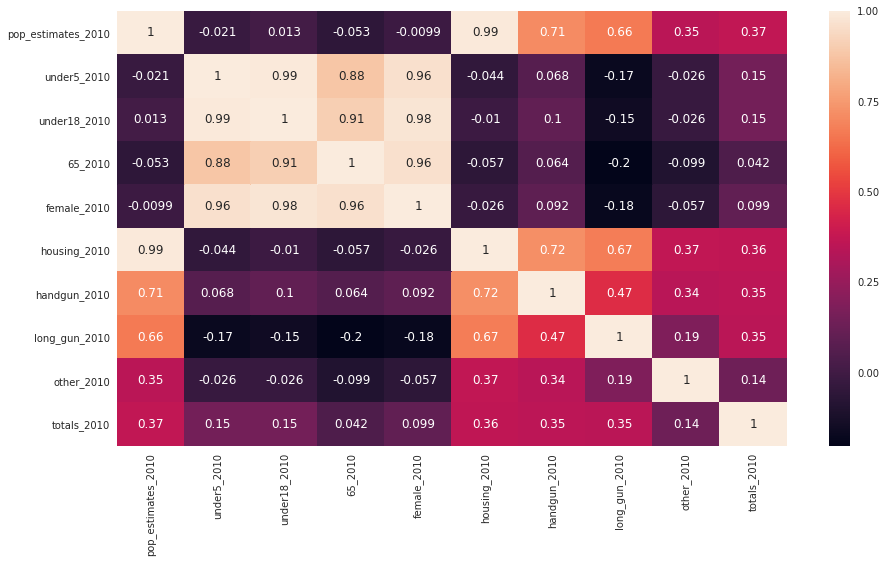

In [39]:
heat_map(2010)

It seems that in 2010, the estimated number of population and the number of housing units were positively correlated with high number of handgun (0.71, 0.72 respectively) and long gun transactions (0.66, 0.67 respectively). However, no trend could be seen between 'other' gun transactions or the total number of gun transactions. 

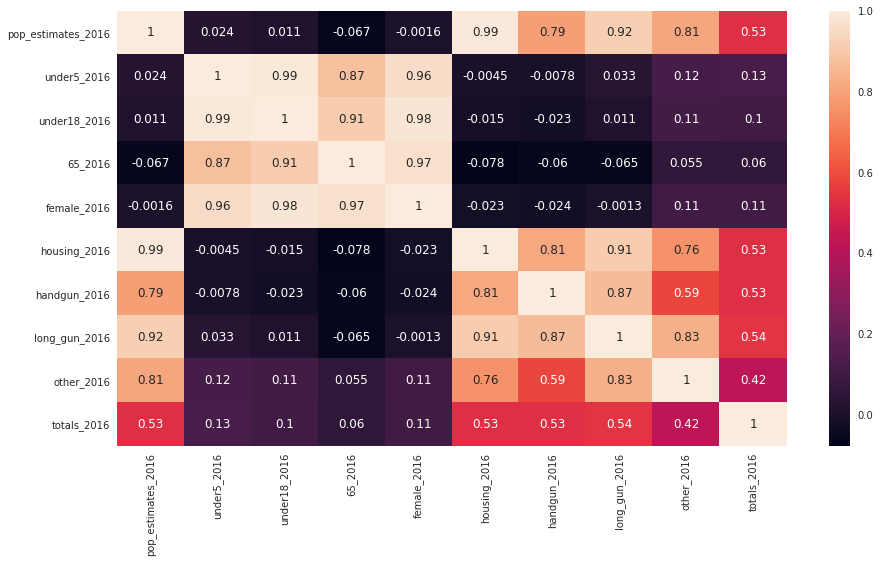

In [40]:
heat_map(2016)

In the 2016 plotted data, a stonger correlation can be seen between the population number and housing units and the handgun (0.79, 0.81 respectively) and long gun (0.92, 0.91 respectively) transactions. Aditionally, a high correlation could be seen between handgun and long gun transactions (0.87), long gun and 'other' gun transactions (0.83), and finally between population estimates and housing units and 'other' gun transactions (0.81, 0.76 respectively).
It is also worth mentioning that the correlations between the population estimates, housing units, long gun transactions and the total transactions in 2016 were higher than those in 2010.

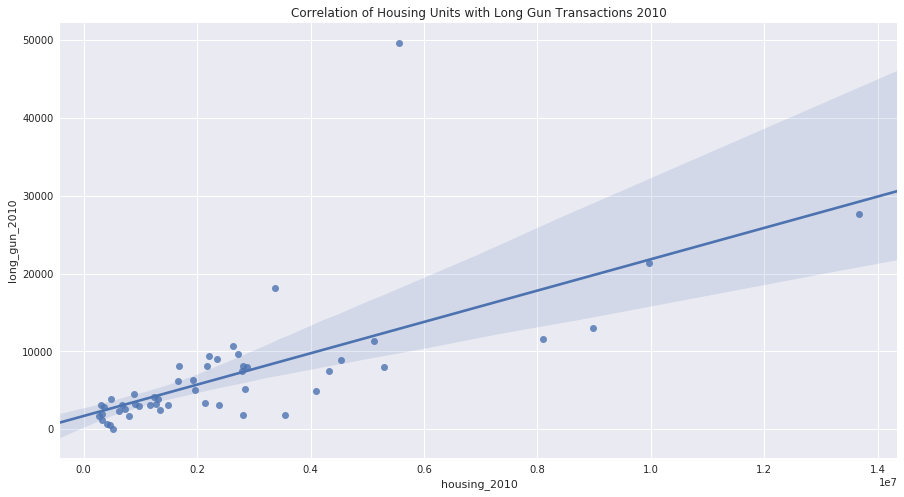

In [41]:
# plot the long gun transactions against the number of housing units in 2010
sns.regplot(x="housing_2010", y="long_gun_2010", data=df_census_gun)
plt.title("Correlation of Housing Units with Long Gun Transactions 2010");

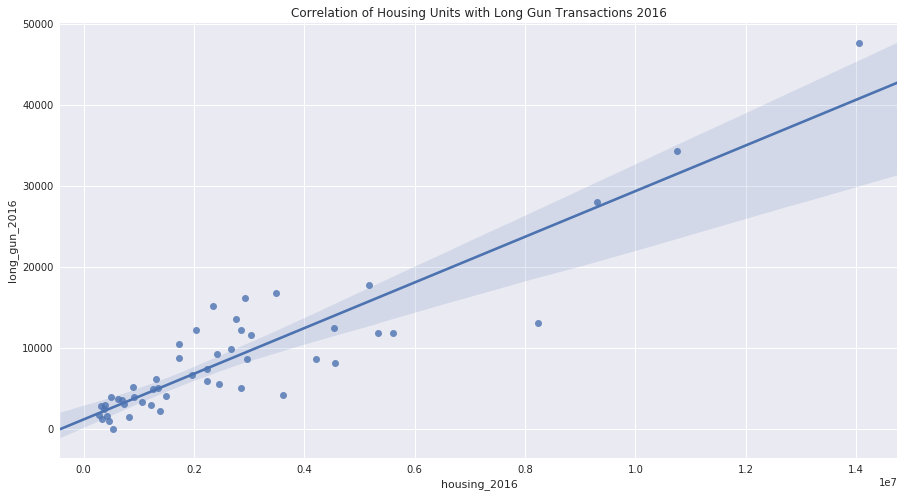

In [42]:
# plot the long gun transactions against the number of housing units in 2016
sns.regplot(x="housing_2016", y="long_gun_2016", data=df_census_gun)
plt.title("Correlation of Housing Units with Long Gun Transactions 2016");

The plots above displaying the number of long gun transactions versus the number of housing units in 2010 and 2016 shows that although the number of long gun transactions increased along with a stronger correlation, the mean number of housing units have not significantly increased from 2010 to 2016. 

### Research Question 2  (Which states had the highest growth in gun registrations from 2010 to 2016?)

From the previously plotted bar chart for the percent change in total gun transactions, it was shown that Kentucky, Illinois, California and Florida had the highest growth in total gun transactions. We can also have a look at the total gun transactions in 2010 and 2016 and see which states had the highest total gun transactions in both years

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


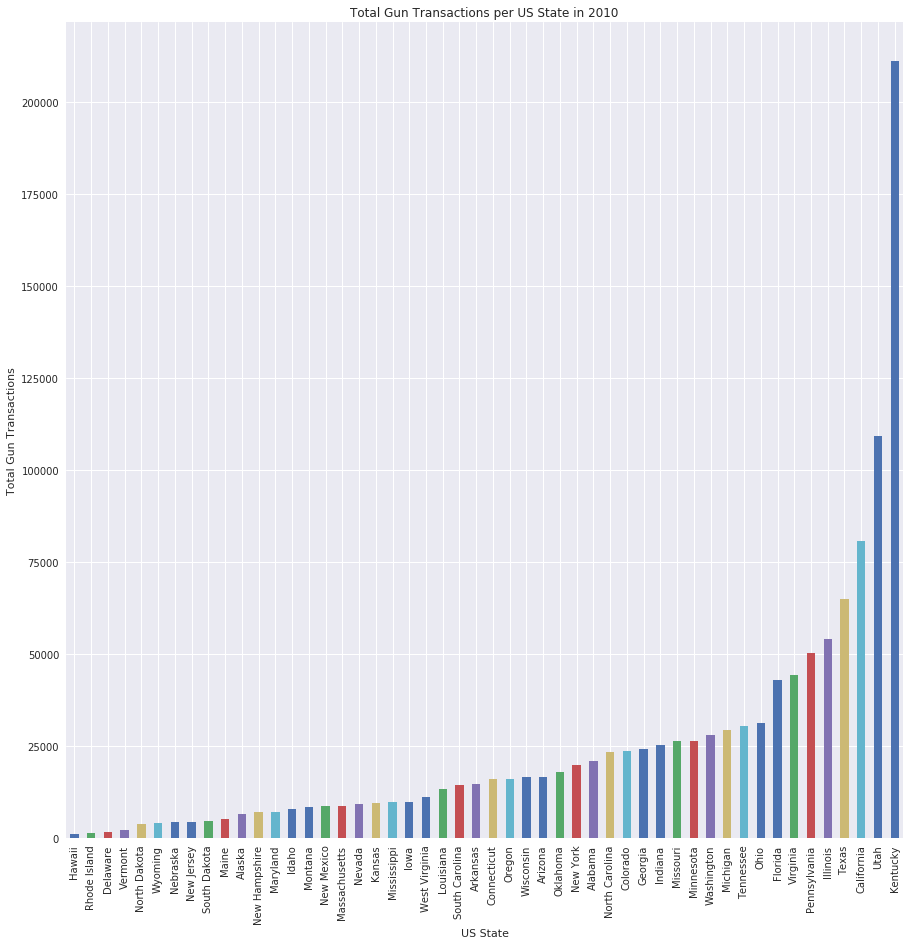

In [43]:
df_gun_01apr2010.sort_values('totals_2010', inplace = True)
df_gun_01apr2010['totals_2010'].plot (kind='bar', figsize=(15,15))
plt.title('Total Gun Transactions per US State in 2010')
plt.xlabel('US State')
plt.ylabel('Total Gun Transactions');

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


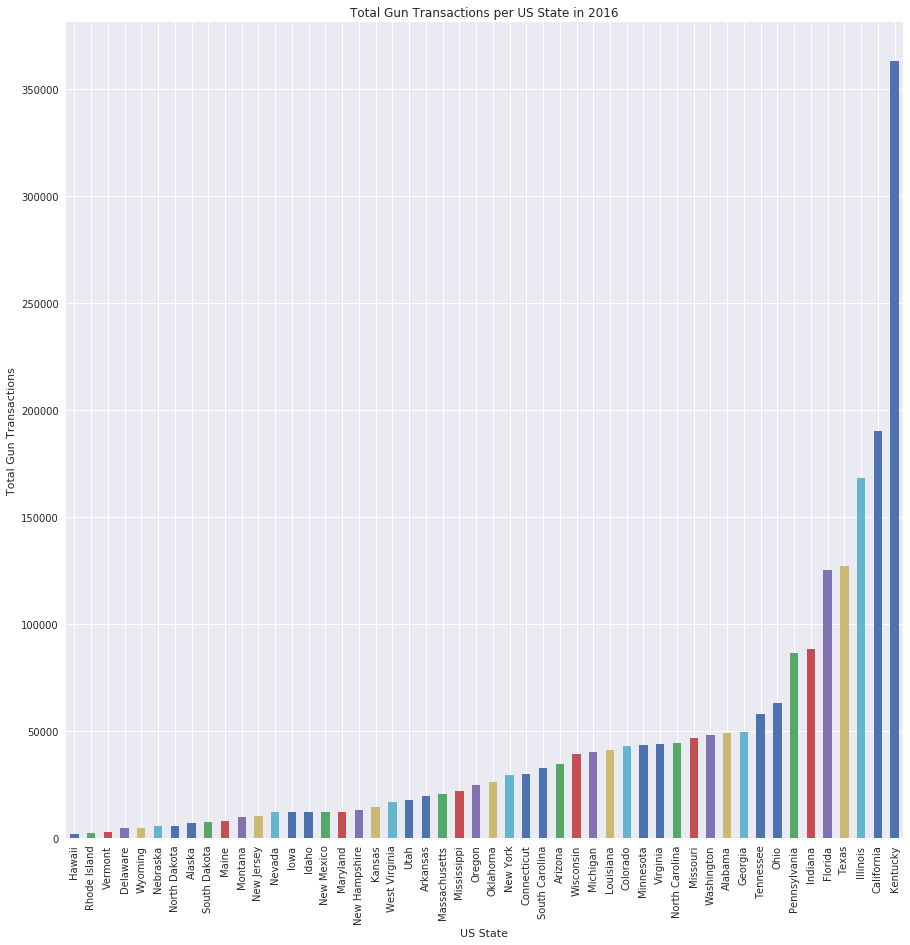

In [44]:
df_gun_01jul2016.sort_values('totals_2016', inplace=True)
df_gun_01jul2016['totals_2016'].plot(kind='bar', figsize=(15,15))
plt.title('Total Gun Transactions per US State in 2016')
plt.xlabel('US State')
plt.ylabel('Total Gun Transactions');

In [45]:
# calculate the folds increase for the total gun transactions since 2010 to 2016
factor = df_census_gun['totals_2016'].max()/df_census_gun['totals_2010'].max()
factor

1.7186560699797879

The graphs above shows that Kentucky had the highest total gun transactions in both years with a 1.7 folds increase in 2016. The interesting thing is that Utah had the second highest total gun transactions in 2010 however in 2016, it ranked 30th in the number of total gun transactions. The factors asscoiated with such decrease in total gun transactions should be further studied in the future. Now, let's plot the handgun and long gun transactions and see which state had the highest handgun and long gun transactions.

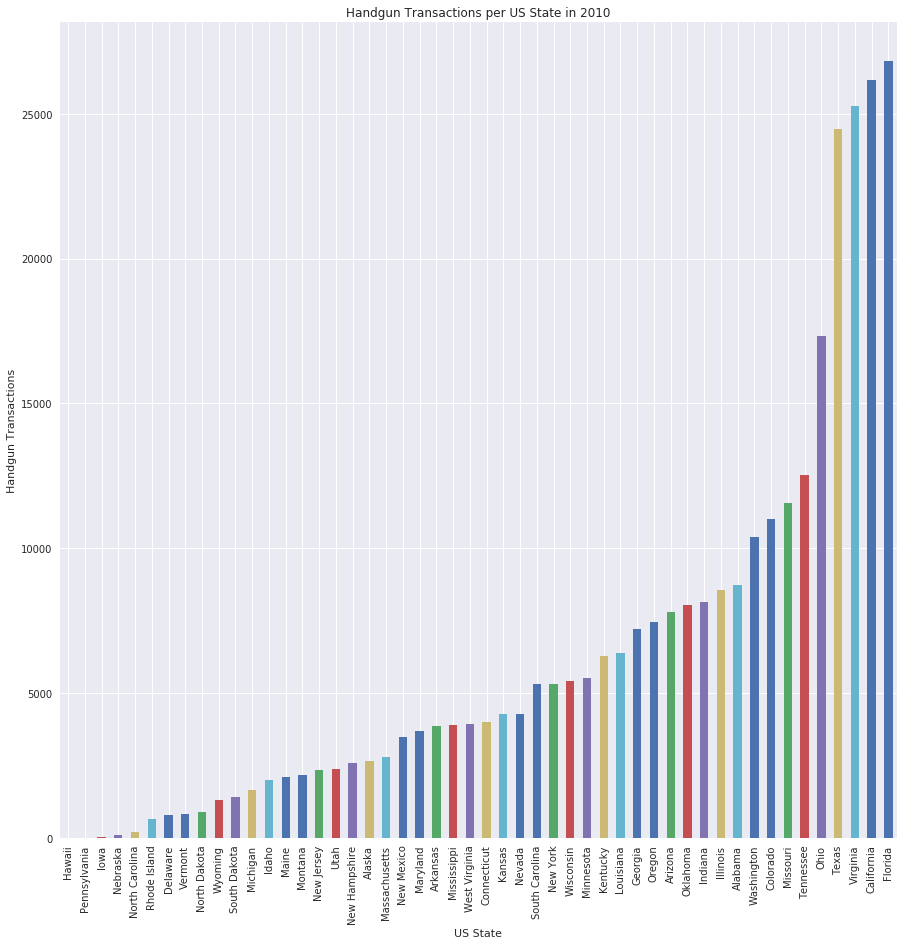

In [46]:
df_census_gun.sort_values('handgun_2010', inplace=True)
df_census_gun['handgun_2010'].plot(kind='bar', figsize=(15,15))
plt.title('Handgun Transactions per US State in 2010')
plt.xlabel('US State')
plt.ylabel('Handgun Transactions');

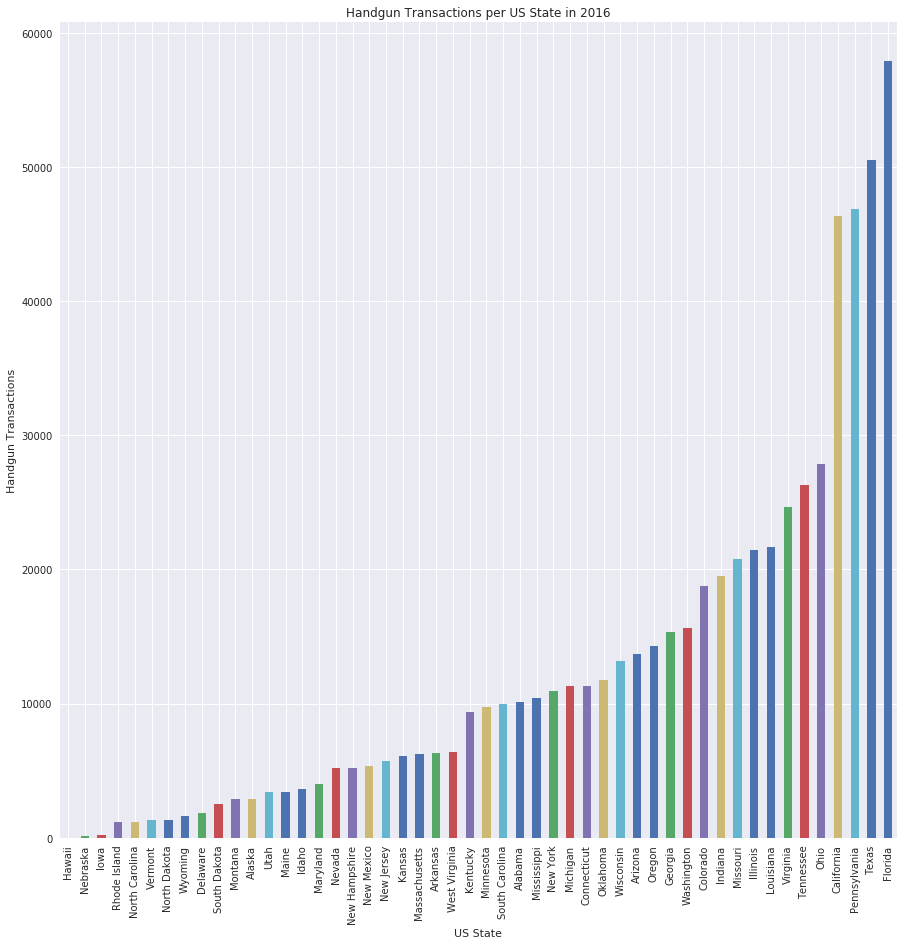

In [47]:
df_census_gun.sort_values('handgun_2016', inplace=True)
df_census_gun['handgun_2016'].plot(kind='bar', figsize=(15,15))
plt.title('Handgun Transactions per US State in 2016')
plt.xlabel('US State')
plt.ylabel('Handgun Transactions');

In 2010; Florida, California, Virginia and Texas were the 4 highest states in handgun transactions with very slight differences. In 2016, Florida remained the highest state with handgun transactions with almost double the number of handgun transactions. Pennsylvania saw a significant increase in the number of handgun transactions going from before last place in 2010 to the third place in 2016 with over 45,000 transactions.

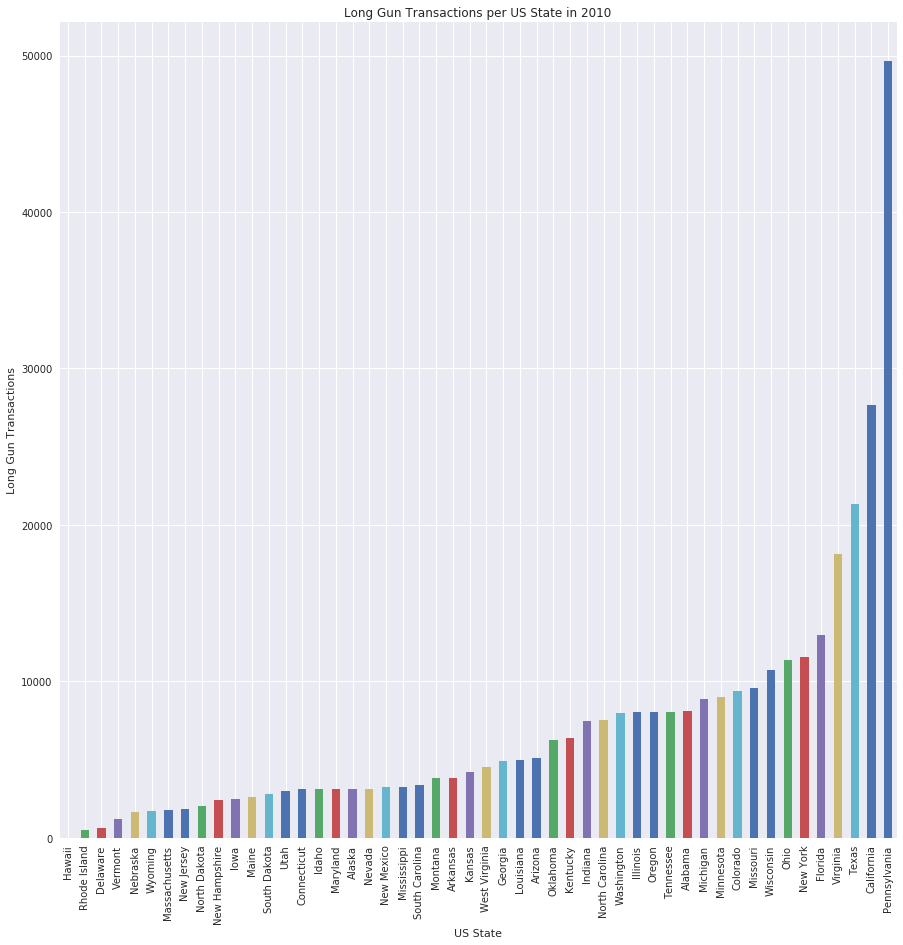

In [48]:
df_census_gun.sort_values('long_gun_2010', inplace=True)
df_census_gun['long_gun_2010'].plot(kind='bar', figsize=(15,15))
plt.title('Long Gun Transactions per US State in 2010')
plt.xlabel('US State')
plt.ylabel('Long Gun Transactions');

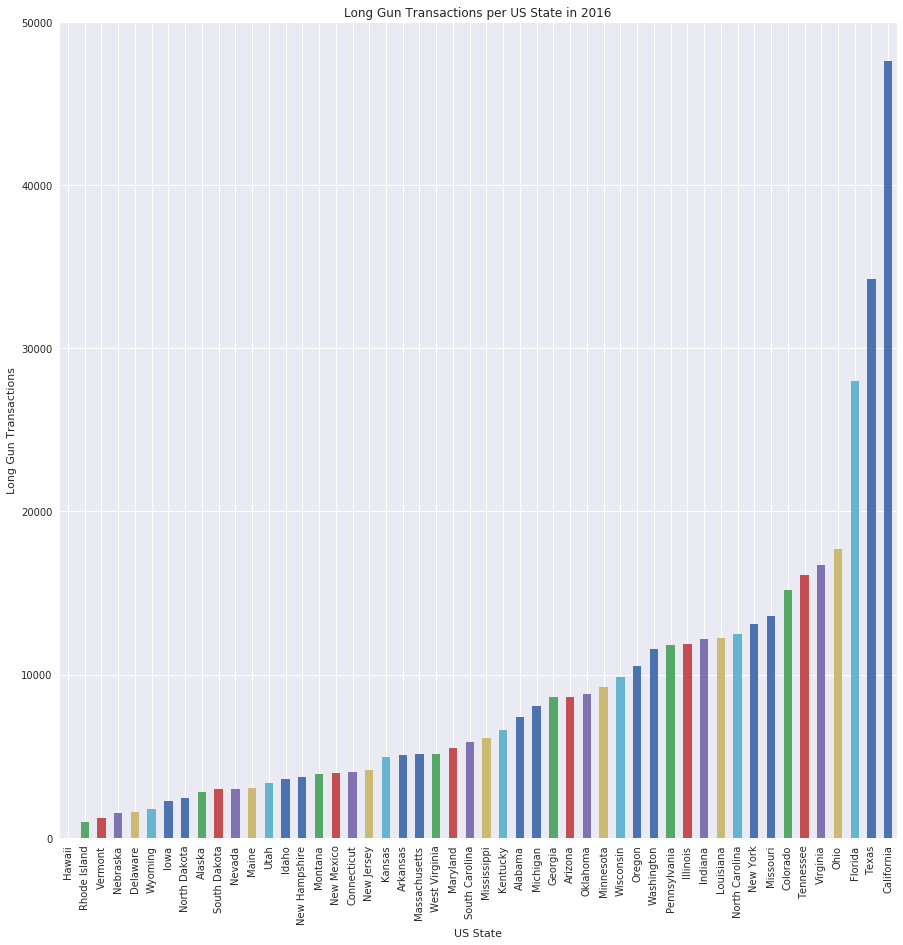

In [49]:
df_census_gun.sort_values('long_gun_2016', inplace=True)
df_census_gun['long_gun_2016'].plot(kind='bar', figsize=(15,15))
plt.title('Long Gun Transactions per US State in 2016')
plt.xlabel('US State')
plt.ylabel('Long Gun Transactions');

Pennsylvania had the highest number of total long gun transactions in 2010 with a total around 50,000 transactions. However, in 2016, the number dropped to a litte over 10,000 transactions while California had a huge increase with almost double the transactions in 2016.

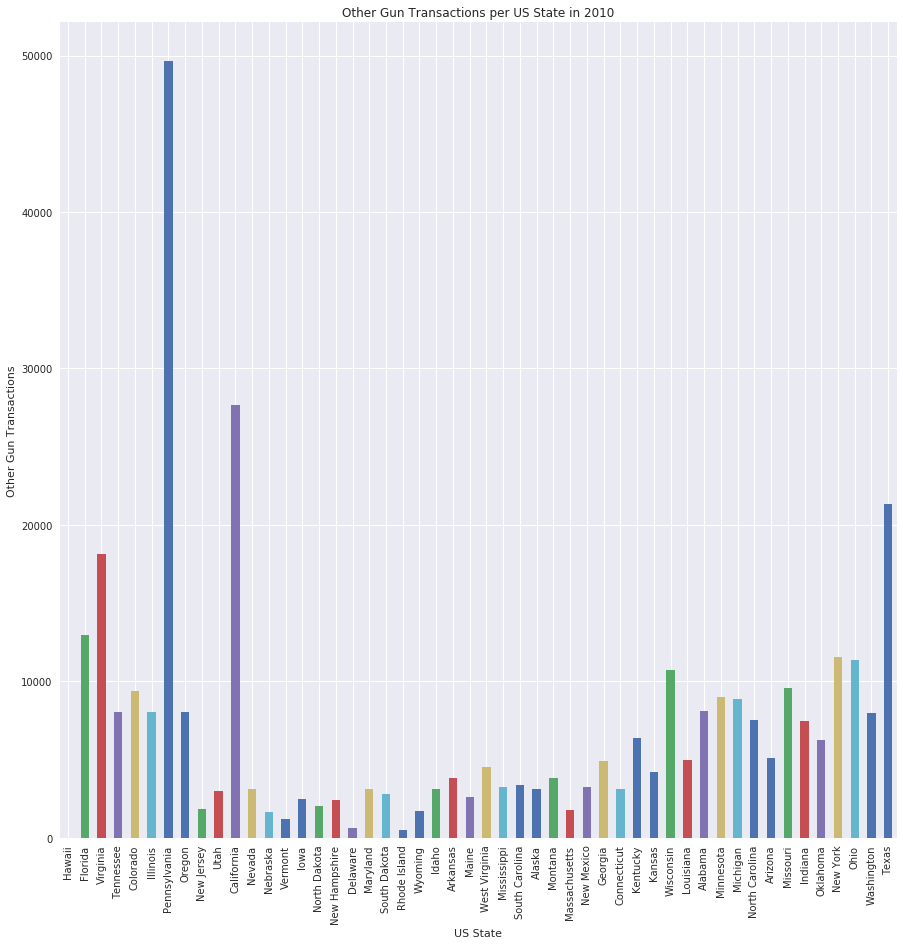

In [50]:
df_census_gun.sort_values('other_2010', inplace=True)
df_census_gun['long_gun_2010'].plot(kind='bar', figsize=(15,15))
plt.title('Other Gun Transactions per US State in 2010')
plt.xlabel('US State')
plt.ylabel('Other Gun Transactions');

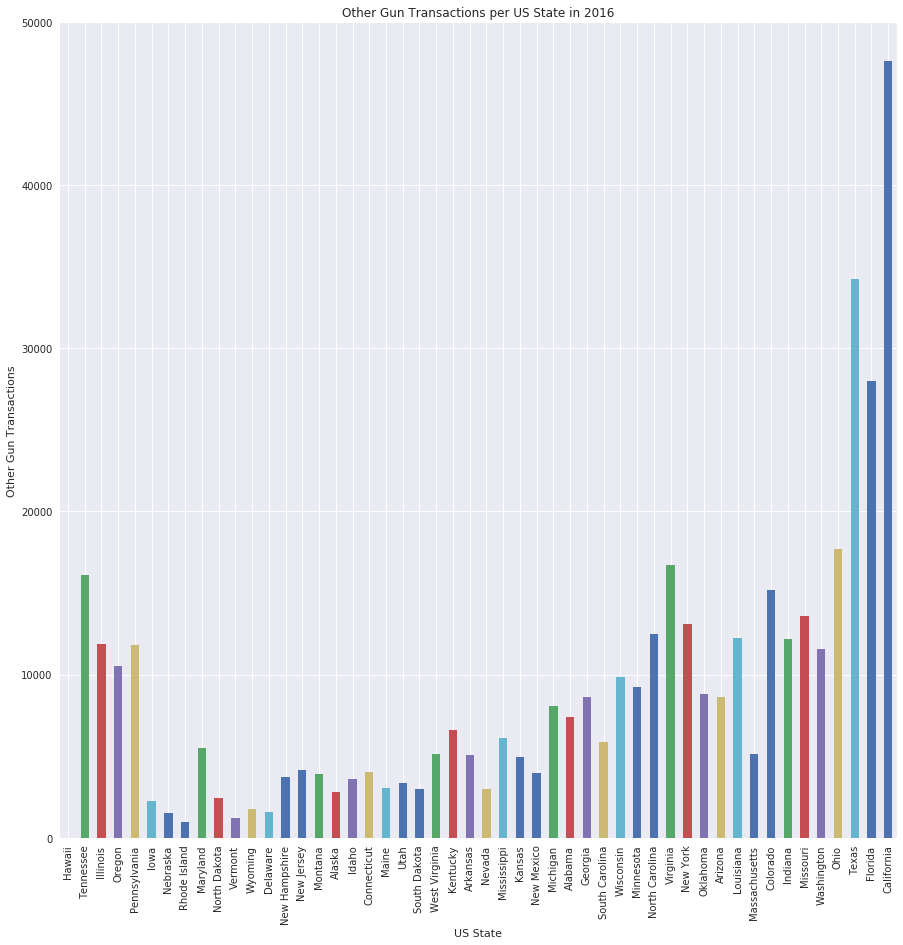

In [51]:
df_census_gun.sort_values('other_2016', inplace=True)
df_census_gun['long_gun_2016'].plot(kind='bar', figsize=(15,15))
plt.title('Other Gun Transactions per US State in 2016')
plt.xlabel('US State')
plt.ylabel('Other Gun Transactions');

Again Pennsylvania had the highest number of 'other' gun transactions in 2010 (around 50,000) however, in 2016, the number dropped to a little over 10,000. California had a huge increase in the number of 'other gun transactions between 2010 and 2016.

<a id='conclusions'></a>
## Conclusions



From the applied analysis and data plots, it can be concluded that the variables mostly associated with high number of handgun and long gun transactions are the number of population and the number of housing units. There was no clear correlation between any of the studied variables and the total number of gun transactions.

Kentucky state had the highest total number or gun transactions in years 2010 and 2016 with a 1.7 folds increase in 2016.

Pennsylvania had the highest number of long gun and 'other' gun transactions in 2010 (around 50,000 transactions) however, this number dropped in 2016 in both categories down to a little above 10,000 transactions. Meanwhile, the state had a significant increase in handgun transactions, going from 0 transactions in 2010 to around 45,000 transactions in 2016.

Utah had the highest percent decrease in total gun transactions between 2010 and 2016.

Additional research must be done to understand the factors that are associated with the decrease in gun transactions among the years and what other variables can be directly correlated with the increase in gun transactions .

### Limitations


The statistics within the gun data document represent the number of firearm background checks initiated though the NICS for transactions and not the number of firearms sold. Therefore, although the number of gun transactions might be high in a city, it does not mean that there is certainly a high number of people carryin



In [52]:
#convert to html
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0